# Imports

In [57]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pareto

# Ler Bases de dados de resultados

In [58]:
baseline = pd.read_csv("./baseline_results.csv")
optimal = pd.read_csv("./optimal_tails.csv")
moments = pd.read_csv("./data_moments.csv")

# Análise dos dados coletados

## 1 - Desempenho dos otimizadores

### 1.1 - Desempenho Geral

[Text(0, 0, 'Real_estate'),
 Text(1, 0, 'Financial_Distress'),
 Text(2, 0, 'solar_radiation'),
 Text(3, 0, 'medical_cost'),
 Text(4, 0, 'house_rent'),
 Text(5, 0, 'employee_performance'),
 Text(6, 0, 'car_price'),
 Text(7, 0, 'Blueberry_Yield'),
 Text(8, 0, 'bike_sharing_hour'),
 Text(9, 0, 'wind_dataset')]

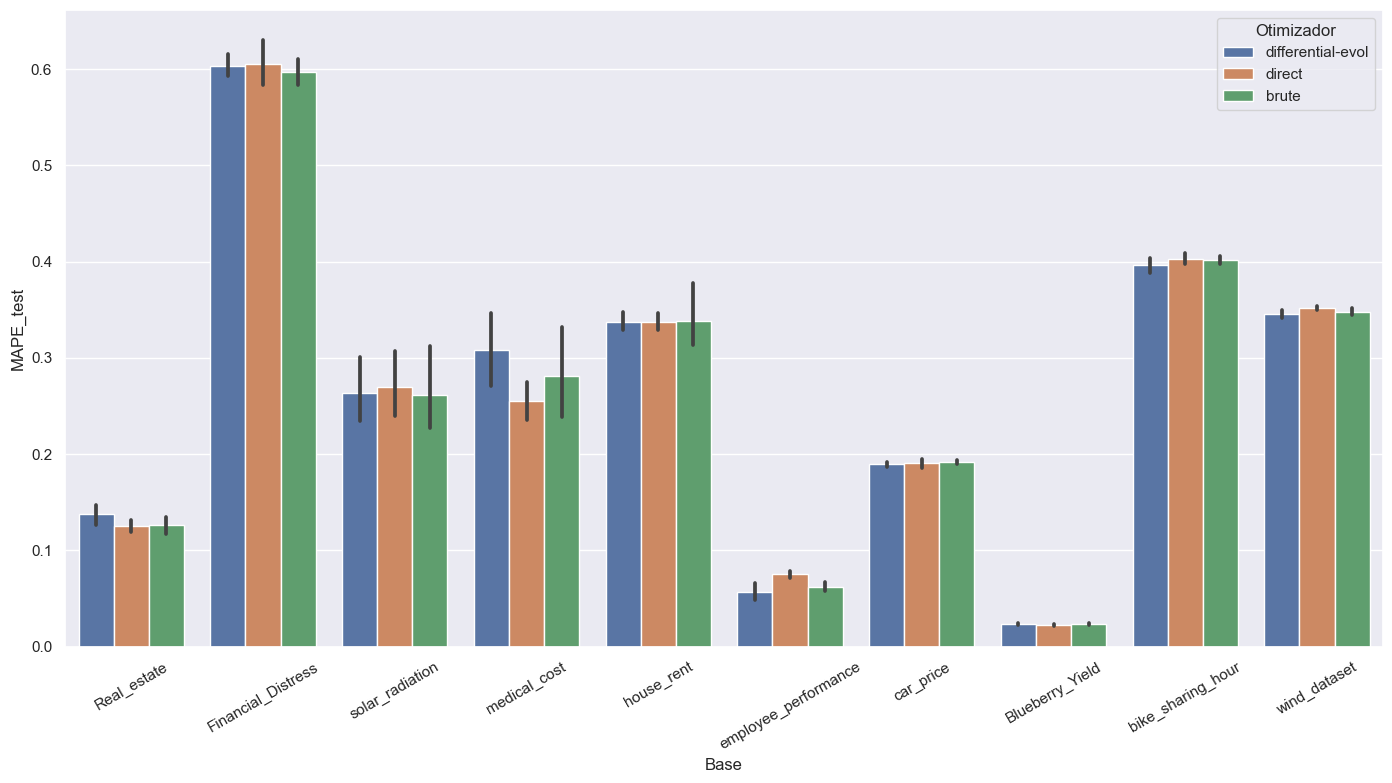

In [59]:
sns.set(rc={'figure.figsize':(17,8.27)})
fig = sns.barplot(data=optimal, x="Base", y="MAPE_test", hue="Otimizador")
fig.set_xticklabels(labels = optimal['Base'].unique(),rotation=30) 

### 1.2 - Desempenho por base

[Text(0, 0, 'differential-evol'), Text(1, 0, 'direct'), Text(2, 0, 'brute')]

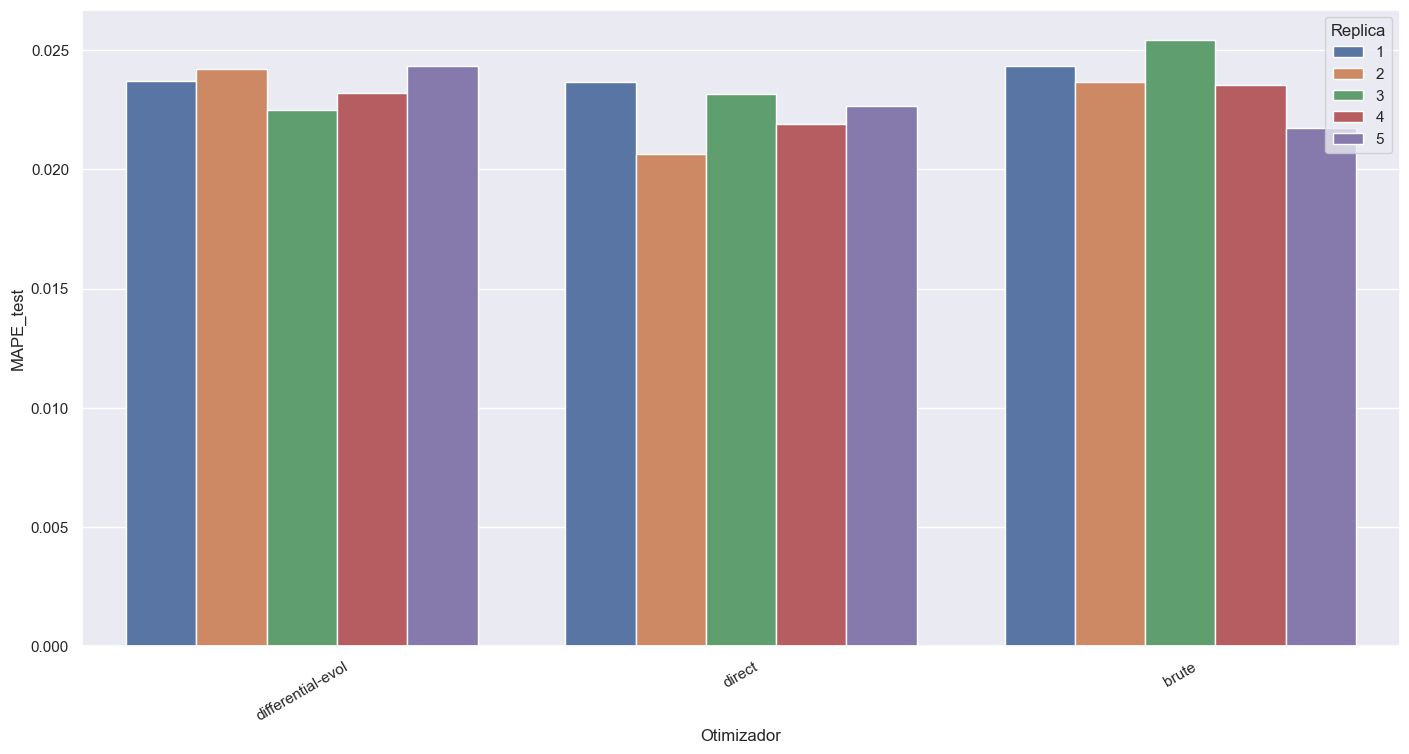

In [60]:
dff = optimal[optimal['Base']=='Blueberry_Yield']
sns.set(rc={'figure.figsize':(17,8.27)})
fig = sns.barplot(data=dff, x='Otimizador', y="MAPE_test", hue="Replica")
fig.set_xticklabels(labels = optimal['Otimizador'].unique(),rotation=30) 

## 2 - Comparação entre Baseline e Optimal Tails

### 2.1 - Dataframe Concat

In [61]:
#Criando uma nova coluna e colocando labels nos dois Dataframes

new_column = []

for index, row in optimal.iterrows():
    new_column.append("optimizer")
    
optimal['strategy'] = pd.Series(new_column)

new_column = []

for index, row in baseline.iterrows():
    new_column.append("baseline")
    
baseline['strategy'] = pd.Series(new_column)

In [62]:
# Juntando os dois dataframes para uma comparação mais facilitada

df = pd.concat([optimal, baseline])

### 2.2 - Comparação Geral

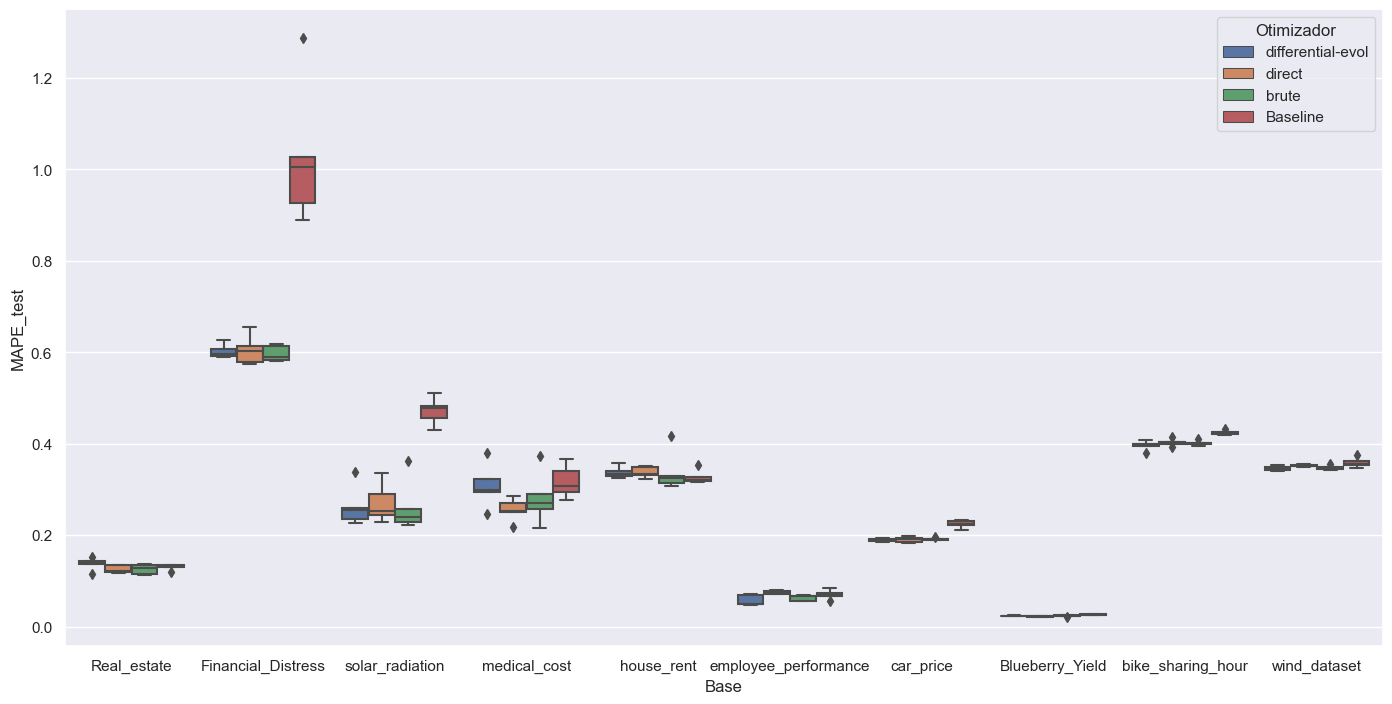

In [63]:
sns.set(rc={'figure.figsize':(17,8.27)})
fig = sns.boxplot(data=df, x="Base", y="MAPE_test", hue = "Otimizador")

### Q-Q Plot

In [64]:
bases = ['Real_estate', 'Financial_Distress', 'solar_radiation', 'medical_cost', 'house_rent', 'employee_performance', 'car_price', 'Blueberry_Yield', 'bike_sharing_hour', 'wind_dataset']
targets = ['Y house price of unit area', 'Financial Distress', 'Radiation', 'remainder__charges', 'remainder__Rent', 'actual_productivity', 'remainder__selling_price', 'yield', 'cnt', 'WIND']

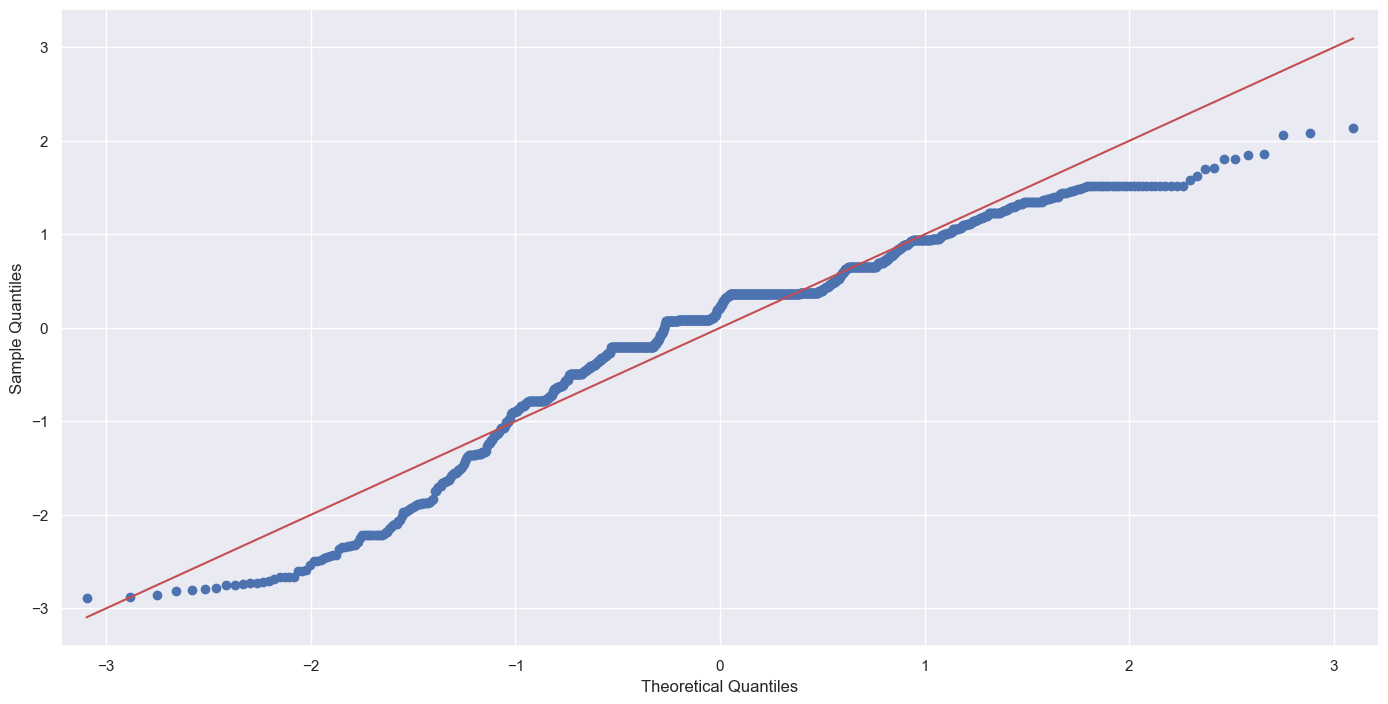

In [65]:
ctrl = 5
b = 2.62

base = pd.read_csv('../preprocessed_data_sets/' + bases[ctrl] + '.csv')

normal_dist = np.random.normal(0, 1, 1000)
pareto_dist = pareto(b)

sm.qqplot(base[targets[ctrl]], line='s', fit=True)

plt.show()

### 2.3 - Comparação por Base

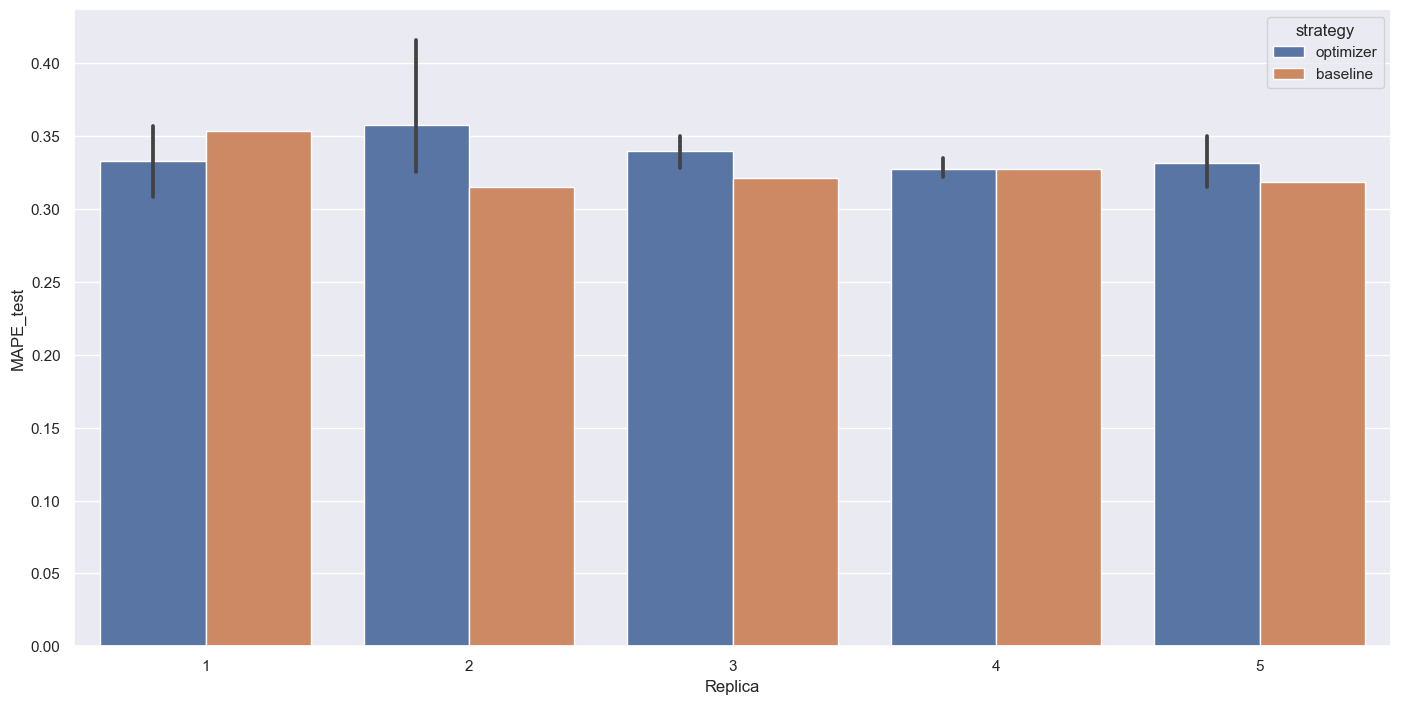

In [66]:
dff = df[df['Base']=='house_rent']
sns.set(rc={'figure.figsize':(17,8.27)})
fig = sns.barplot(data=dff, x='Replica', y="MAPE_test", hue = "strategy")

## 3 - Análise Estatistica com Momentos

In [67]:
moments

,Base,ordem_1,ordem_2,ordem_3,ordem_4,ordem_5,ordem_6,kurtosis,skewness
0,wind_dataset,0.0,2.476947e+01,7.959200e+01,1.970514e+03,1.784857e+04,3.096293e+05,0.211782,0.645646
1,Real_estate,0.0,1.846893e+02,1.500131e+03,1.752719e+05,8.389294e+06,6.705882e+08,2.138410,0.597677
2,Financial_Distress,0.0,7.032393e+00,5.755254e+02,7.181937e+04,9.127846e+06,1.162265e+09,1449.229746,30.860987
3,solar_radiation,0.0,9.980011e+04,4.318134e+07,3.496801e+10,2.487490e+13,1.943680e+16,0.510822,1.369618
4,medical_cost,0.0,1.465428e+08,2.686111e+12,9.869426e+16,3.142968e+21,1.135558e+26,1.595821,1.514180
5,house_rent,0.0,6.099326e+09,1.019532e+16,3.136932e+22,1.061100e+29,3.655139e+35,840.220941,21.403175
6,employee_performance,0.0,3.035195e-02,-4.383344e-03,3.144674e-03,-9.353351e-04,4.902922e-04,0.413519,-0.828945
7,car_price,0.0,6.618332e+11,2.237722e+18,1.034636e+25,5.186666e+31,2.872834e+38,20.620578,4.156075
8,Blueberry_Yield,0.0,1.838958e+06,-8.010910e+08,8.851556e+12,-1.081428e+16,6.705205e+19,-0.382564,-0.321236
9,bike_sharing_hour,0.0,3.289957e+04,7.622171e+06,4.780284e+09,2.369099e+12,1.395986e+15,1.416450,1.277301


In [68]:
merged_df = pd.merge(optimal,moments,left_on='Base',right_on='Base')

print(merged_df['MAPE_test'].corr(merged_df['ordem_2']))
print(merged_df['MAPE_test'].corr(merged_df['ordem_3']))
print(merged_df['MAPE_test'].corr(merged_df['ordem_4']))
print(merged_df['MAPE_test'].corr(merged_df['ordem_5']))
print(merged_df['MAPE_test'].corr(merged_df['ordem_6']))
print(merged_df['MAPE_test'].corr(merged_df['kurtosis']))
print(merged_df['MAPE_test'].corr(merged_df['skewness']))

#sns.scatterplot(data=df, x='kurtosis', y='MAPE_test', hue='strategy')
#sns.scatterplot(data=merged_df, x='kurtosis', y='MAPE_test')



-0.14790118381215397
-0.1485246690667388
-0.14872694322339716
-0.14885757495355642
-0.14895992516015835
0.6987923280334648
0.710005182368603


### 3.1 - Kurtose

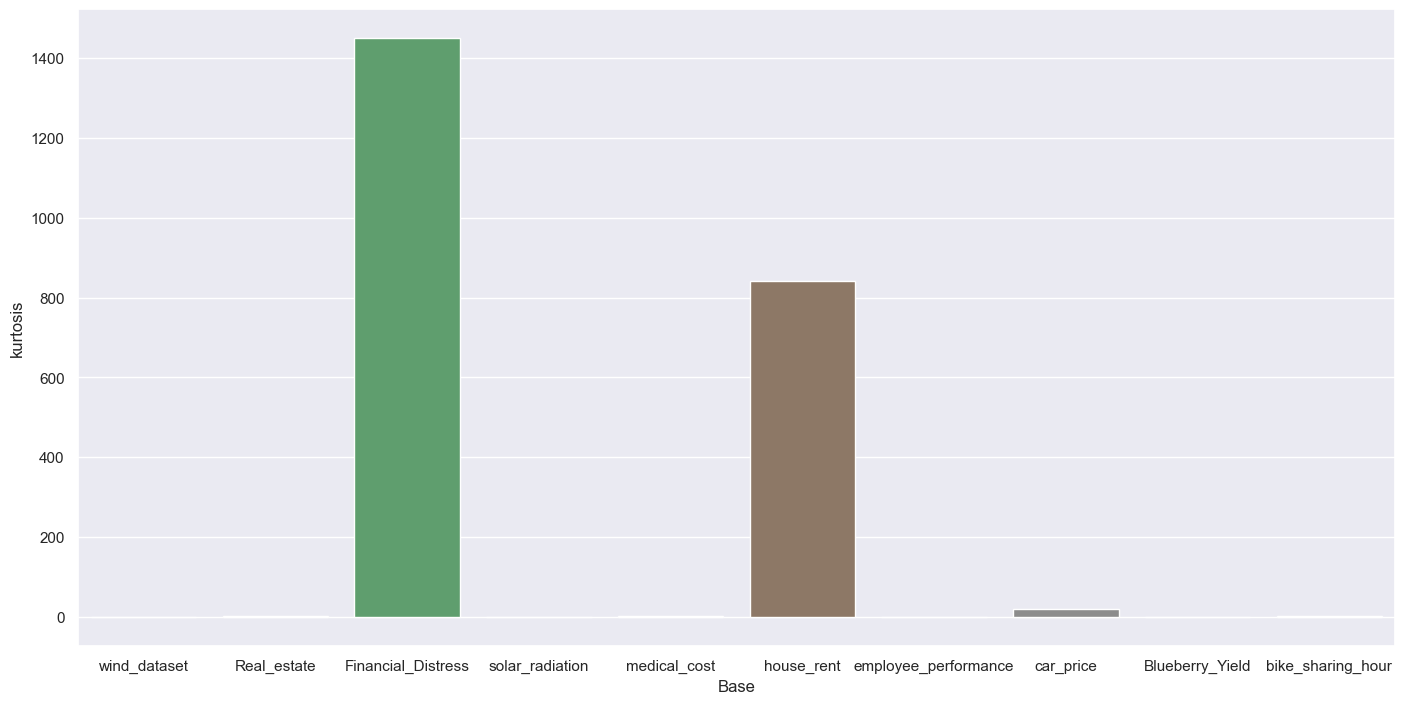

In [69]:
sns.set(rc={'figure.figsize':(17,8.27)})
fig = sns.barplot(data=moments, x='Base', y="kurtosis")

### 3.2 - Assimetria (Skewness)

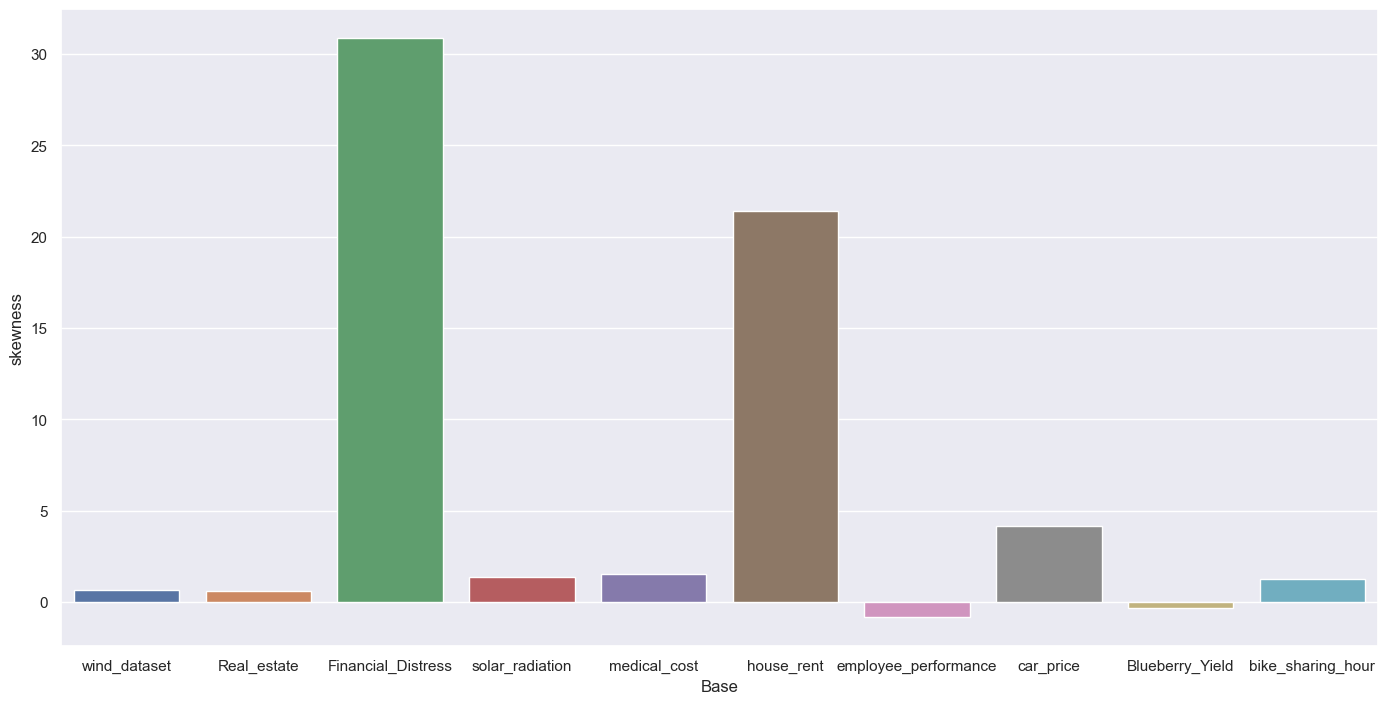

In [70]:
sns.set(rc={'figure.figsize':(17,8.27)})
fig = sns.barplot(data=moments, x='Base', y="skewness")

### 3.3 - 